# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import io
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Rasio 70:30

## Import Data

In [ ]:
# URL CSV untuk sheet "mentah"
csv_url = 'https://docs.google.com/spreadsheets/d/1at1-KUFm4nnRxRl5TcPd9Yl3yD6hNiRL/gviz/tq?tqx=out:csv&sheet=data'

# Membaca data dari CSV
df = pd.read_csv(csv_url)

# Menampilkan beberapa baris pertama data
df

,date,temp,tempmax,tempmin,dew,humidity,winddir
0,1/1/2020,25.2,31.1,23.3,23.8,91.9,64.5
1,1/2/2020,25.8,30.1,22.7,23.4,87.1,258.7
2,1/3/2020,25.9,30.1,23.4,23.7,88.3,311.5
3,1/4/2020,25.7,30.1,23.6,23.7,89.1,251.0
4,1/5/2020,25.4,29.1,23.2,23.8,91.3,254.1
...,...,...,...,...,...,...,...
1638,6/26/2024,25.6,31.2,22.0,21.4,79.1,67.9
1639,6/27/2024,26.0,31.4,22.8,22.0,80.2,70.1
1640,6/28/2024,25.5,30.1,22.5,22.2,83.6,187.8
1641,6/29/2024,25.1,30.1,22.8,22.3,85.2,205.9


## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Misalkan df adalah data yang sudah dibaca
# Differencing untuk membuat data stasioner
df['temp_diff'] = df['temp'].diff().dropna()
df['tempmax_diff'] = df['tempmax'].diff().dropna()
df['tempmin_diff'] = df['tempmin'].diff().dropna()
df['dew_diff'] = df['dew'].diff().dropna()
df['humidity_diff'] = df['humidity'].diff().dropna()
df['winddir_diff'] = df['winddir'].diff().dropna()

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]

# Pisahkan variabel target dan eksogen
y_train = train['temp'].dropna()
X_train = train[['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']].dropna()
y_test = test['temp'].dropna()
X_test = test[['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']].dropna()

# Pastikan index target dan eksogen sejajar
X_train, y_train = X_train.align(y_train, join='inner', axis=0)
X_test, y_test = X_test.align(y_test, join='inner', axis=0)

## Modelling

In [ ]:
#Model ARIMAX
modelarimax414 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax413 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax412 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax411 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax410 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax314 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax313 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax312 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax311 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax310 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax214 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax213 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax212 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax211 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax210 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax114 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax113 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax112 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax111 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax110 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax014 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax013 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax012 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax011 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax010 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

In [ ]:
print(modelarimax414.summary())
print(modelarimax413.summary())
print(modelarimax412.summary())
print(modelarimax411.summary())
print(modelarimax410.summary())

print(modelarimax314.summary())
print(modelarimax313.summary())
print(modelarimax312.summary())
print(modelarimax311.summary())
print(modelarimax310.summary())

print(modelarimax214.summary())
print(modelarimax213.summary())
print(modelarimax212.summary())
print(modelarimax211.summary())
print(modelarimax210.summary())

print(modelarimax114.summary())
print(modelarimax113.summary())
print(modelarimax112.summary())
print(modelarimax111.summary())
print(modelarimax110.summary())

print(modelarimax014.summary())
print(modelarimax013.summary())
print(modelarimax012.summary())
print(modelarimax011.summary())
print(modelarimax010.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 1150
Model:               SARIMAX(4, 1, 4)   Log Likelihood                1184.867
Date:                Mon, 17 Mar 2025   AIC                          -2341.734
Time:                        13:41:23   BIC                          -2271.081
Sample:                             0   HQIC                         -2315.063
                               - 1150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tempmax        0.0587      0.003     22.429      0.000       0.054       0.064
tempmin        0.0072      0.005      1.523      0.128      -0.002       0.016
dew            0.9235      0.008    114.076      0.0

In [ ]:
#Model ARIMAX
modelarimax414c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax413c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax412c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax411c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax410c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax314c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax313c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax312c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax311c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax310c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax214c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax213c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax212c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax211c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax210c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax114c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax113c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax112c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax111c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax110c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax014c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax013c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax012c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax011c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax010c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py

In [ ]:
print(modelarimax414c.summary())
print(modelarimax413c.summary())
print(modelarimax412c.summary())
print(modelarimax411c.summary())
print(modelarimax410c.summary())

print(modelarimax314c.summary())
print(modelarimax313c.summary())
print(modelarimax312c.summary())
print(modelarimax311c.summary())
print(modelarimax310c.summary())

print(modelarimax214c.summary())
print(modelarimax213c.summary())
print(modelarimax212c.summary())
print(modelarimax211c.summary())
print(modelarimax210c.summary())

print(modelarimax114c.summary())
print(modelarimax113c.summary())
print(modelarimax112c.summary())
print(modelarimax111c.summary())
print(modelarimax110c.summary())

print(modelarimax014c.summary())
print(modelarimax013c.summary())
print(modelarimax012c.summary())
print(modelarimax011c.summary())
print(modelarimax010c.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 1150
Model:               SARIMAX(4, 1, 4)   Log Likelihood                1187.593
Date:                Mon, 17 Mar 2025   AIC                          -2345.185
Time:                        13:43:36   BIC                          -2269.486
Sample:                             0   HQIC                         -2316.609
                               - 1150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.229      0.819      -0.001       0.001
tempmax        0.0520      0.003     18.402      0.000       0.047       0.058
tempmin        0.0067      0.005      1.371      0.1

## Prediksi ARIMAX(1,1,0) with constant

In [ ]:
# Prediksi dengan model ARIMAX
y_pred = modelarimax110c.forecast(exog=X_test, steps=len(y_test))

# Tampilkan hasil prediksi
print("Prediksi: ")
print(y_pred)

Prediksi: 
1150    24.283180
1151    24.449144
1152    24.448414
1153    23.978965
1154    24.365677
          ...    
1638    25.587467
1639    25.930561
1640    25.332772
1641    25.097573
1642    25.056986
Name: predicted_mean, Length: 493, dtype: float64


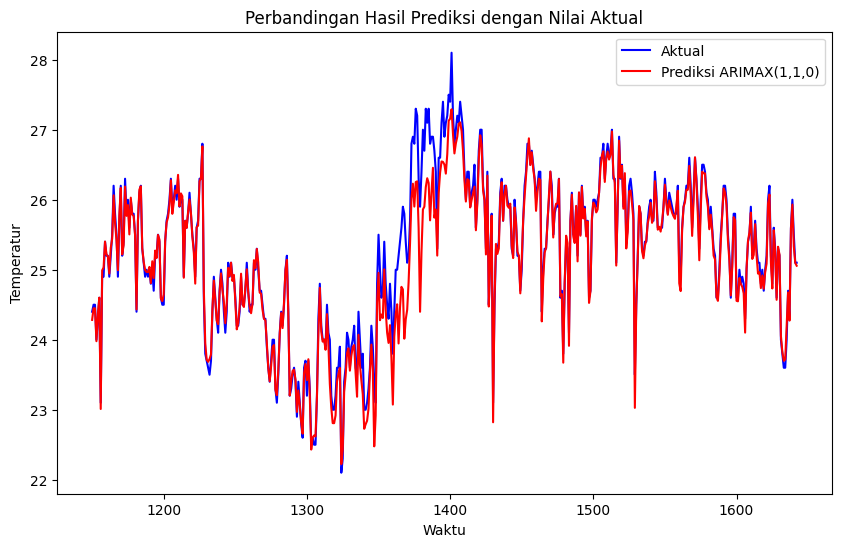

In [ ]:
# Plot perbandingan antara nilai aktual dan prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Aktual', color='blue')
plt.plot(y_test.index, y_pred, label='Prediksi ARIMAX(1,1,0)', color='red')
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.title('Perbandingan Hasil Prediksi dengan Nilai Aktual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Hitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# MAPE memerlukan perhitungan manual
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Tampilkan hasil
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

MSE: 0.07918033043876907
RMSE: 0.2813899970481699
MAE: 0.14824973348965878
MAPE: 0.5813271745438133%


In [ ]:
# Membuat DataFrame untuk y_pred
accuracy = pd.DataFrame({'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape]})

# Simpan ke file Excel
accuracy.to_excel('fix_7030_arimax_acc.xlsx', index=False)

print("Akurasi telah disimpan ke file")

Akurasi telah disimpan ke file


In [ ]:
y_pred.to_excel('fix_7030_arimax.xlsx', index=False)

print("Prediksi Test telah disimpan ke file")

Prediksi Test telah disimpan ke file


# Rasio 80:20

## Import Data

In [ ]:
# URL CSV untuk sheet "mentah"
csv_url = 'https://docs.google.com/spreadsheets/d/1at1-KUFm4nnRxRl5TcPd9Yl3yD6hNiRL/gviz/tq?tqx=out:csv&sheet=data'

# Membaca data dari CSV
df = pd.read_csv(csv_url)

# Menampilkan beberapa baris pertama data
df

,date,temp,tempmax,tempmin,dew,humidity,winddir
0,1/1/2020,25.2,31.1,23.3,23.8,91.9,64.5
1,1/2/2020,25.8,30.1,22.7,23.4,87.1,258.7
2,1/3/2020,25.9,30.1,23.4,23.7,88.3,311.5
3,1/4/2020,25.7,30.1,23.6,23.7,89.1,251.0
4,1/5/2020,25.4,29.1,23.2,23.8,91.3,254.1
...,...,...,...,...,...,...,...
1638,6/26/2024,25.6,31.2,22.0,21.4,79.1,67.9
1639,6/27/2024,26.0,31.4,22.8,22.0,80.2,70.1
1640,6/28/2024,25.5,30.1,22.5,22.2,83.6,187.8
1641,6/29/2024,25.1,30.1,22.8,22.3,85.2,205.9


## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Misalkan df adalah data yang sudah dibaca
# Differencing untuk membuat data stasioner
df['temp_diff'] = df['temp'].diff().dropna()
df['tempmax_diff'] = df['tempmax'].diff().dropna()
df['tempmin_diff'] = df['tempmin'].diff().dropna()
df['dew_diff'] = df['dew'].diff().dropna()
df['humidity_diff'] = df['humidity'].diff().dropna()
df['winddir_diff'] = df['winddir'].diff().dropna()

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Pisahkan variabel target dan eksogen
y_train = train['temp'].dropna()
X_train = train[['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']].dropna()
y_test = test['temp'].dropna()
X_test = test[['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']].dropna()

# Pastikan index target dan eksogen sejajar
X_train, y_train = X_train.align(y_train, join='inner', axis=0)
X_test, y_test = X_test.align(y_test, join='inner', axis=0)

## Modelling

In [ ]:
#Model ARIMAX
modelarimax414 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax413 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax412 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax411 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax410 = SARIMAX(endog=y_train, exog=X_train, order=(4,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax314 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax313 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax312 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax311 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax310 = SARIMAX(endog=y_train, exog=X_train, order=(3,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax214 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax213 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax212 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax211 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax210 = SARIMAX(endog=y_train, exog=X_train, order=(2,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax114 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax113 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax112 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax111 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax110 = SARIMAX(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

modelarimax014 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,4), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax013 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,3), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax012 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,2), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax011 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,1), seasonal_order=(0,0,0,0), trend='n').fit()
modelarimax010 = SARIMAX(endog=y_train, exog=X_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend='n').fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Conver

In [ ]:
print(modelarimax414.summary())
print(modelarimax413.summary())
print(modelarimax412.summary())
print(modelarimax411.summary())
print(modelarimax410.summary())

print(modelarimax314.summary())
print(modelarimax313.summary())
print(modelarimax312.summary())
print(modelarimax311.summary())
print(modelarimax310.summary())

print(modelarimax214.summary())
print(modelarimax213.summary())
print(modelarimax212.summary())
print(modelarimax211.summary())
print(modelarimax210.summary())

print(modelarimax114.summary())
print(modelarimax113.summary())
print(modelarimax112.summary())
print(modelarimax111.summary())
print(modelarimax110.summary())

print(modelarimax014.summary())
print(modelarimax013.summary())
print(modelarimax012.summary())
print(modelarimax011.summary())
print(modelarimax010.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 1314
Model:               SARIMAX(4, 1, 4)   Log Likelihood                1380.340
Date:                Wed, 26 Mar 2025   AIC                          -2732.681
Time:                        10:29:40   BIC                          -2660.160
Sample:                             0   HQIC                         -2705.484
                               - 1314                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tempmax        0.0611      0.002     25.207      0.000       0.056       0.066
tempmin        0.0105      0.004      2.357      0.018       0.002       0.019
dew            0.9208      0.008    121.987      0.0

In [ ]:
#Model ARIMAX
modelarimax414c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax413c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax412c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax411c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax410c = SARIMAX(endog=y_train, exog=X_train, order=(4,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax314c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax313c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax312c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax311c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax310c = SARIMAX(endog=y_train, exog=X_train, order=(3,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax214c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax213c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax212c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax211c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax210c = SARIMAX(endog=y_train, exog=X_train, order=(2,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax114c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax113c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax112c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax111c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax110c = SARIMAX(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

modelarimax014c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,4), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax013c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,3), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax012c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,2), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax011c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,1), seasonal_order=(0,0,0,0), trend='c').fit()
modelarimax010c = SARIMAX(endog=y_train, exog=X_train, order=(0,1,0), seasonal_order=(0,0,0,0), trend='c').fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary s

In [ ]:
print(modelarimax414c.summary())
print(modelarimax413c.summary())
print(modelarimax412c.summary())
print(modelarimax411c.summary())
print(modelarimax410c.summary())

print(modelarimax314c.summary())
print(modelarimax313c.summary())
print(modelarimax312c.summary())
print(modelarimax311c.summary())
print(modelarimax310c.summary())

print(modelarimax214c.summary())
print(modelarimax213c.summary())
print(modelarimax212c.summary())
print(modelarimax211c.summary())
print(modelarimax210c.summary())

print(modelarimax114c.summary())
print(modelarimax113c.summary())
print(modelarimax112c.summary())
print(modelarimax111c.summary())
print(modelarimax110c.summary())

print(modelarimax014c.summary())
print(modelarimax013c.summary())
print(modelarimax012c.summary())
print(modelarimax011c.summary())
print(modelarimax010c.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 1314
Model:               SARIMAX(4, 1, 4)   Log Likelihood                1383.316
Date:                Wed, 26 Mar 2025   AIC                          -2736.633
Time:                        10:31:57   BIC                          -2658.932
Sample:                             0   HQIC                         -2707.493
                               - 1314                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.297e-05      0.001     -0.079      0.937      -0.001       0.001
tempmax        0.0575      0.003     22.137      0.000       0.052       0.063
tempmin        0.0082      0.005      1.735      0.0

## Prediksi ARIMAX(2,1,0)

In [ ]:
# Prediksi dengan model ARIMAX
y_pred = modelarimax210.forecast(exog=X_test, steps=len(y_test))

# Tampilkan hasil prediksi
print("Prediksi: ")
print(y_pred)

Prediksi: 
1314    24.400276
1315    23.939364
1316    23.390180
1317    23.051244
1318    22.828104
          ...    
1638    25.634847
1639    25.982749
1640    25.383198
1641    25.151290
1642    25.105411
Name: predicted_mean, Length: 329, dtype: float64


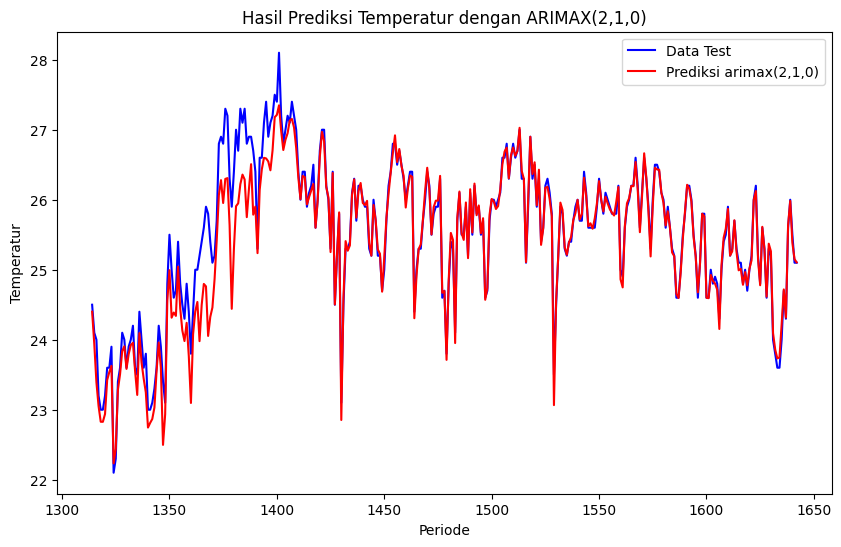

In [ ]:
# Plot perbandingan antara nilai aktual dan prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Data Test', color='blue')
plt.plot(y_test.index, y_pred, label='Prediksi arimax(2,1,0)', color='red')
plt.xlabel('Periode')
plt.ylabel('Temperatur')
plt.title('Hasil Prediksi Temperatur dengan ARIMAX(2,1,0)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Hitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# MAPE memerlukan perhitungan manual
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Tampilkan hasil
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

MSE: 0.1033123920177767
RMSE: 0.32142245101700145
MAE: 0.17325206880842042
MAPE: 0.6758698917004248%


In [ ]:
# Membuat DataFrame untuk y_pred
accuracy = pd.DataFrame({'MSE': [mse], 'RMSE': [rmse], 'MAE': [mae], 'MAPE': [mape]})

# Simpan ke file Excel
accuracy.to_excel('fixx_8020_arimax_acc.xlsx', index=False)

print("Akurasi telah disimpan ke file")

Akurasi telah disimpan ke file


In [ ]:
y_pred.to_excel('fixx_8020_arimax.xlsx', index=False)

print("Prediksi Test telah disimpan ke file")

Prediksi Test telah disimpan ke file


# Prediksi Outsample dengan ARIMAX(2,1,0)

In [ ]:
# Pisahkan variabel target (Y) dan eksogen (X)
y = df['temp'].dropna()
X = df[['tempmax', 'tempmin', 'dew', 'humidity', 'winddir']].dropna()

# Pastikan jumlah baris X dan y sama
X, y = X.iloc[len(X) - len(y):], y.iloc[len(y) - len(X):]

# 2. Melatih Model ARIMAX
model_best = SARIMAX(endog=y, exog=X, order=(2, 1, 0))  # ARIMAX(3, 1, 1)
arimax_result_best = model_best.fit()

In [ ]:
# 3. Membuat Prediksi 31 Periode ke Depan
# Data eksogen untuk 31 periode ke depan (1 Juli 2024 - 31 Juli 2024)
future_exog = np.array([[tempmax, tempmin, dew, humidity, winddir] for tempmax, tempmin, dew, humidity, winddir in zip(
    [32.1, 31.1, 31.8, 29.8, 30.5, 32.5, 31.1, 31.3, 31.5, 31.7, 30.2, 30.3, 30.0, 29.0, 28.9, 29.9, 31.1, 30.8, 30.7, 29.8, 30.7, 29.8, 30.1, 29.6, 30.5, 30.9, 31.9, 30.3, 29.9, 30.5, 31.1], #tempmax
    [21.3, 23.3, 22.4, 24.0, 22.6, 23.3, 22.6, 23.1, 20.6, 21.5, 20.6, 19.5, 20.6, 17.9, 19.5, 18.9, 20.7, 22.1, 20.0, 20.2, 18.0, 19.6, 20.4, 20.8, 20.1, 19.3, 21.0, 21.2, 20.7, 20.0, 21.6], #tempmin
    [21.2, 22.5, 22.6, 23.0, 21.7, 21.4, 22.2, 22.1, 20.9, 21.3, 19.8, 19.3, 18.9, 17.6, 18.0, 19.1, 19.8, 20.7, 19.4, 19.4, 19.0, 19.6, 20.4, 20.6, 19.9, 19.7, 20.9, 20.7, 20.7, 21.1, 21.9], #dew
    [75.6, 79.0, 79.5, 85.9, 76.1, 73.1, 78.4, 80.3, 77.2, 78.0, 75.8, 75.6, 73.6, 72.6, 72.0, 75.4, 74.0, 76.8, 75.4, 76.6, 75.8, 76.2, 77.8, 80.0, 76.8, 76.3, 80.0, 80.9, 82.2, 81.6, 81.4], #humidity
    [142.3, 142.4, 150.8, 152, 99.4, 50.2, 70.1, 142.6, 171.8, 138.6, 149.7, 142, 165.7, 146.2, 167.7, 151.1, 151.2, 158.2, 145.1, 166.5, 175.9, 187, 197.1, 211.3, 205.9, 166.8, 158.4, 168.4, 170.5, 178.4, 182.9] #winddir
)])

y_pred_future = arimax_result_best.forecast(steps=31, exog=future_exog)

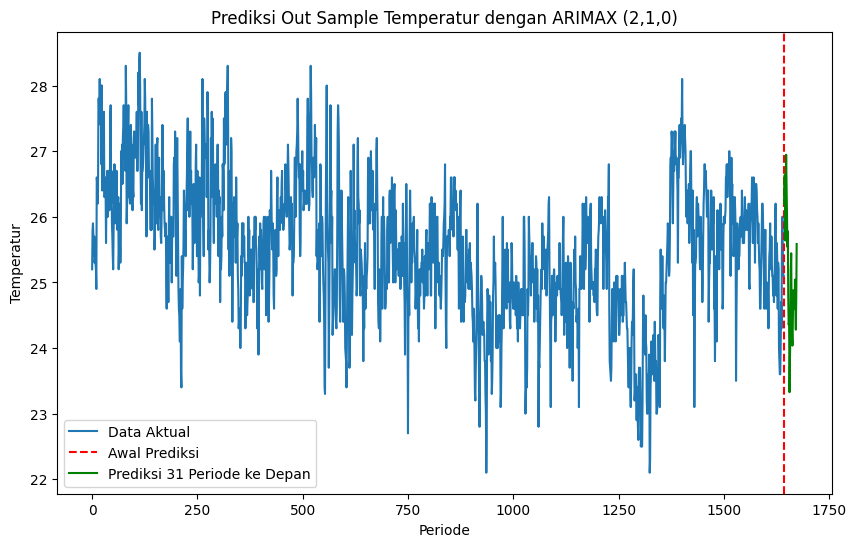

In [ ]:
# 4. Visualisasi Hasil
plt.figure(figsize=(10, 6))
plt.plot(y, label='Data Aktual')
plt.axvline(len(y), color='r', linestyle='--', label='Awal Prediksi')
plt.plot(range(len(y), len(y) + 31), y_pred_future, label='Prediksi 31 Periode ke Depan', color='g')
plt.legend()
plt.title('Prediksi Out Sample Temperatur dengan ARIMAX (2,1,0)')
plt.xlabel('Periode')
plt.ylabel('Temperatur')
plt.show()

In [ ]:
y_pred_future.to_excel('outsample arimax(210).xlsx', index='false')

In [ ]:
# URL CSV untuk sheet "mentah"
dfoutsample = 'https://docs.google.com/spreadsheets/d/1at1-KUFm4nnRxRl5TcPd9Yl3yD6hNiRL/gviz/tq?tqx=out:csv&sheet=outsample'

# Membaca data dari CSV
outsample = pd.read_csv(dfoutsample)

# Menampilkan beberapa baris pertama data
outsample

,datetime,tempmax,tempmin,dew,humidity,winddir,temp,arimax210 prediction,selisih
0,2024-07-01,32.1,21.3,21.2,75.6,142.3,26.6,26.198756,0.401244
1,2024-07-02,31.1,23.3,22.5,79.0,142.4,26.6,26.621213,-0.021213
2,2024-07-03,31.8,22.4,22.6,79.5,150.8,26.8,26.637392,0.162608
3,2024-07-04,29.8,24.0,23.0,85.9,152.0,25.6,25.638265,-0.038265
4,2024-07-05,30.5,22.6,21.7,76.1,99.4,26.6,26.439231,0.160769
5,2024-07-06,32.5,23.3,21.4,73.1,50.2,26.9,26.944987,-0.044987
6,2024-07-07,31.1,22.6,22.2,78.4,70.1,26.5,26.471201,0.028799
7,2024-07-08,31.3,23.1,22.1,80.3,142.6,26.2,26.038402,0.161598
8,2024-07-09,31.5,20.6,20.9,77.2,171.8,25.8,25.542265,0.257735
9,2024-07-10,31.7,21.5,21.3,78.0,138.6,25.9,25.778067,0.121933


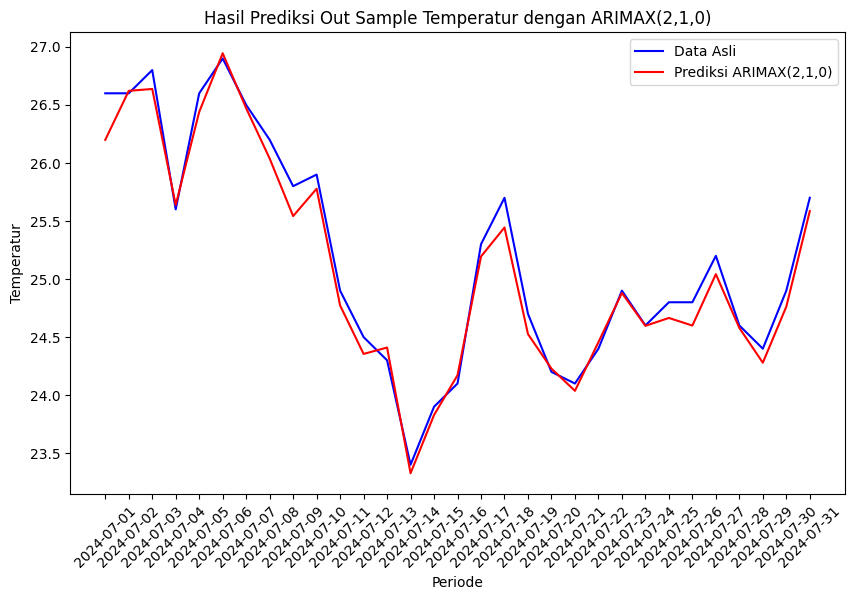

In [ ]:
# Plot perbandingan antara nilai aktual dan prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(outsample['datetime'], outsample['temp'], label='Data Asli', color='blue')
plt.plot(outsample['datetime'], outsample['arimax210 prediction'], label='Prediksi ARIMAX(2,1,0)', color='red')

# Format plot
plt.xlabel('Periode')
plt.ylabel('Temperatur')
plt.title('Hasil Prediksi Out Sample Temperatur dengan ARIMAX(2,1,0)')
plt.legend()
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()
